In [1]:
import cv2

def edgedetectusingcannyandgaussian(img):
    # cv2.imshow('Original', img)
    cv2.waitKey(0)
 
# # Convert to graycsale
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
    # print(type(img))
    img_blur = cv2.GaussianBlur(img, (3,3), 0) 
 
# Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
    # cv2.imshow('Sobel X', sobelx)
    # cv2.waitKey(0)
    # cv2.imshow('Sobel Y', sobely)
    # cv2.waitKey(0)
    # cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
    # cv2.waitKey(0)
 
# Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
    
# Display Canny Edge Detection Image
#     cv2.imshow('Canny Edge Detection', edges)
#     cv2.waitKey(0)
 
#     cv2.destroyAllWindows()
    return edges


Epoch 1/45
13/13 [==============================] - 10s 625ms/step - loss: 2.6914 - accuracy: 0.5021 - val_loss: 1.6708 - val_accuracy: 0.6832
Epoch 2/45
13/13 [==============================] - 7s 574ms/step - loss: 1.5093 - accuracy: 0.5514 - val_loss: 1.4162 - val_accuracy: 0.3168
Epoch 3/45
13/13 [==============================] - 8s 598ms/step - loss: 1.2824 - accuracy: 0.4896 - val_loss: 1.1799 - val_accuracy: 0.4969
Epoch 4/45
13/13 [==============================] - 8s 592ms/step - loss: 1.1282 - accuracy: 0.4618 - val_loss: 1.0698 - val_accuracy: 0.3168
Epoch 5/45
13/13 [==============================] - 8s 597ms/step - loss: 1.0300 - accuracy: 0.4576 - val_loss: 0.9888 - val_accuracy: 0.3416
Epoch 6/45
13/13 [==============================] - 7s 570ms/step - loss: 0.9554 - accuracy: 0.5153 - val_loss: 0.9119 - val_accuracy: 0.7081
Epoch 7/45
13/13 [==============================] - 8s 587ms/step - loss: 0.8764 - accuracy: 0.6208 - val_loss: 1.2864 - val_accuracy: 0.3168
Epoch

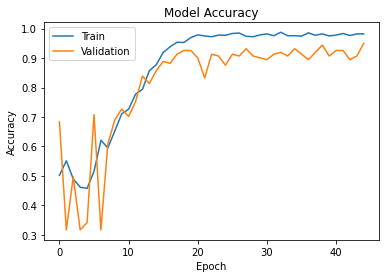

1/1 [==============================] - 0s 78ms/step
[[0.99930024]] 1
6/6 [==============================] - 0s 37ms/step
Predicted:  [1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0]
Actual:     [1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0]
Confusion Matrix
[[107   3]
 [  6  45]]
f1 score 0.9090909090909091
Precision: 0.9375
Recall: 0.8823529411764706


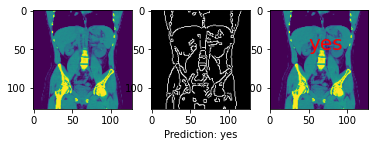

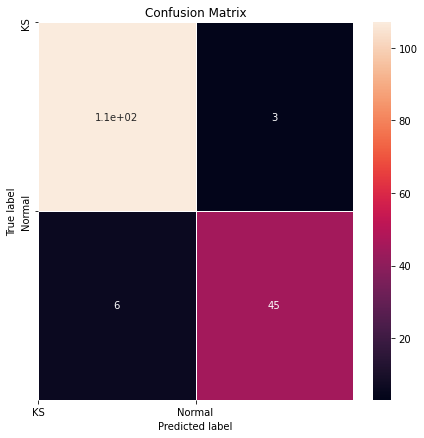

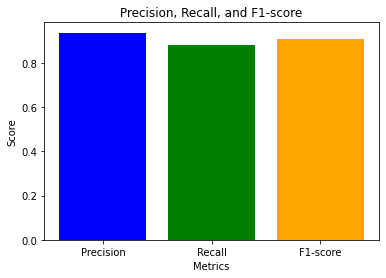

In [3]:
import numpy as np 
import matplotlib.pyplot as plt  
import cv2 
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# import edgedetectusingcannyandgaussian as gass # Import the function from edgedetectusingcannyandgaussian module
import seaborn as sns

from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

def show_img(title, image):     
    cv2.imshow(title, image)     
    cv2.waitKey(0)     
    cv2.destroyAllWindows() 

def get_data(path):
    pixels = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_size = (128, 128)                 
    pixels = cv2.resize(pixels, new_size) 
    edges =edgedetectusingcannyandgaussian(pixels)
    processed_image = cv2.normalize(edges, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
    processed_image = np.reshape(processed_image, (128, 128, 1)) 
    label = None
    if str(path[-6:]) == "KS.png":
        label = 1
    elif str(path[-5:]) == "N.png":
        label = 0      
    return pixels, processed_image, label

def find_edge_and_normalize(): 
    raw_images = [] 
    processed_images = [] 
    labels = []
    src_folder = "KidneyStones"
    for file in os.listdir(src_folder):
        pixels = cv2.imread(os.path.join(src_folder, file), cv2.IMREAD_GRAYSCALE)
        new_size = (128, 128)                 
        pixels = cv2.resize(pixels, new_size) 
        edges =edgedetectusingcannyandgaussian(pixels)
        processed_image = cv2.normalize(edges, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
        processed_image = np.reshape(processed_image, (128, 128, 1)) 
        raw_images.append(pixels)       
        processed_images.append(processed_image) 
        if str(file[-6:]) == "KS.png":
            labels.append(1)
        elif str(file[-5:]) == "N.png":
            labels.append(0)       
    return np.array(raw_images), np.array(processed_images), np.array(labels) 

def define_cnn_model(input_shape):
    model = keras.Sequential([
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.25),  # Dropout layer added
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Additional Dense layer with regularization
        keras.layers.Dropout(0.25),  # Dropout layer added
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

def maincode(path):
    raw_images, processed_images, labels = find_edge_and_normalize()

    # Define CNN model
    input_shape = (128, 128, 1)
    model = define_cnn_model(input_shape)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Calculate class weights

    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(labels), y=labels)


    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(processed_images, labels, test_size=0.1, random_state=32)
     # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)


    # Train the model with class weights

    # Calculate class weights (assuming you have calculated them earlier)
    unique_labels = np.unique(labels)
    class_weight_dict = dict(zip(unique_labels, class_weights))

    # Train the model with class weights as a dictionary
    history = model.fit(X_train, y_train, epochs=45, batch_size=115, validation_data=(X_val, y_val), class_weight=class_weight_dict)


    # Evaluate the model on the validation set
    loss, accuracy = model.evaluate(X_val, y_val)
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Load and process a single image for testing
    image_path = path
    raw_image, processed_image, label = get_data(image_path)
    
    # Display the original image, processed image, and prediction
    f, axarr = plt.subplots(1, 3) 
    processed = processed_image.reshape(128, 128)  
    axarr[0].imshow(raw_image) 
    axarr[1].imshow(processed, cmap='gray') 
    prediction = model.predict(np.array([processed_image]))     
    print(prediction, label)     
    processed = processed_image.reshape(128, 128)         
    if prediction[0] >= 0.75: 
        result = 'yes'         
    else: 
        result = 'no'         
    output = raw_image.copy()
#     output_img = cv2.putText(output, result, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA) 
#     axarr[2].imshow(output_img) 
#     plt.savefig("output")
    axarr[1].set_xlabel('Prediction: ' + result)  # Set the xlabel to display the prediction
    axarr[2].imshow(output)  # Display the image without overlaying the text
    axarr[2].text(50, 50, result, fontsize=20, color='red')  # Display the prediction text below the image
    plt.savefig("output")  # Save the figure
    prediction = model.predict(X_val)
    
    threshold = 0.75
    y_pred = np.where(prediction > threshold, 1, 0)
    y_pred=y_pred.flatten()
    print('Predicted: ', y_pred[0:30])
    print('Actual:    ', y_val[0:30])
    print("Confusion Matrix")
    cm = confusion_matrix(y_true=y_val, y_pred=y_pred)
    print(cm)
    
    # Calculate precision
    precision = precision_score(y_val, y_pred)

    # Calculate recall
    recall = recall_score(y_val, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_val, y_pred)
    print("f1 score", f1)

    print("Precision:", precision)
    print("Recall:", recall)

    def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
        fig, ax = plt.subplots(figsize=(6,6))    
        ax = sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

        ax.set_title(title)
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes)

        plt.tight_layout()
        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label')
    cm_plot_labels = ['KS', 'Normal']
    plot_cm(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
    plt.show()
    # Plot precision, recall, and F1-score
    labels = ['Precision', 'Recall', 'F1-score']
    values = [precision, recall, f1]
    

    plt.bar(labels, values, color=['blue', 'green', 'orange'])
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-score')
    plt.show()

if __name__ == "__main__":
     maincode("C:\\Users\\srkan\\Desktop\\final project\\kidney stone detection\\KidneyStones\\43KS.png")
